In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from subgrid_parameterization.preprocess import SAM_helpers as sam
from subgrid_parameterization.preprocess.C14 import get_C14
from subgrid_parameterization.preprocess.mixing_length import get_mixing_length

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
from sklearn.metrics import r2_score

In [3]:
path0 = "/glade/work/stepheba/les_and_clubb_benchmark_runs/stepheba_sam_runs/derecho/"

path = "sam-bomex/"
file = "BOMEX_64x64x75_100m_40m_1s"
# file = 'BOMEX_3d'

# path = 'sam-rf01/'
# file = 'DYCOMS_RF01_96x96x320'
# file = '*_3d'

# # RF01 won't work until stretched grid is implemented
# path = 'sam-rf02/'
# file = 'DYCOMS_RF02_128x128x96_dr_nosed'
# file = '*_3d'

In [4]:
ds = xr.open_dataset(path0 + path + file + ".nc")

In [5]:
ds

<xarray.Dataset> Size: 47MB
Dimensions:      (x: 1, y: 1, z: 75, time: 360)
Coordinates:
  * x            (x) float32 4B -56.5
  * y            (y) float32 4B 15.0
  * z            (z) float32 300B 20.0 60.0 100.0 ... 2.9e+03 2.94e+03 2.98e+03
  * time         (time) datetime64[ns] 3kB 1969-06-22T00:01:00 ... 1969-06-22...
Data variables: (12/446)
    p            (z) float32 300B ...
    PREC         (time) float32 1kB ...
    CWP          (time) float32 1kB ...
    IWP          (time) float32 1kB ...
    RWP          (time) float32 1kB ...
    SWP          (time) float32 1kB ...
    ...           ...
    THLPRRP_IP   (time, z, y, x) float32 108kB ...
    RTPNRP_IP    (time, z, y, x) float32 108kB ...
    THLPNRP_IP   (time, z, y, x) float32 108kB ...
    RRPNRP_IP    (time, z, y, x) float32 108kB ...
    RRP3_IP      (time, z, y, x) float32 108kB ...
    NRP3_IP      (time, z, y, x) float32 108kB ...
Attributes:
    SAM version:  
    caseid:       64x64x75_100m_40m_1s
    Conventions:  COARDS

In [6]:
# nzm, nzt, ngrdcol, zm, zt, dzm, dzt, invrs_dzm, invrs_dzt
nzm, nzt, ngrdcol, zm, zt, dzm, dzt, invrs_dzm, invrs_dzt = sam.get_grid(ds)

In [7]:
C14 = get_C14(ds)

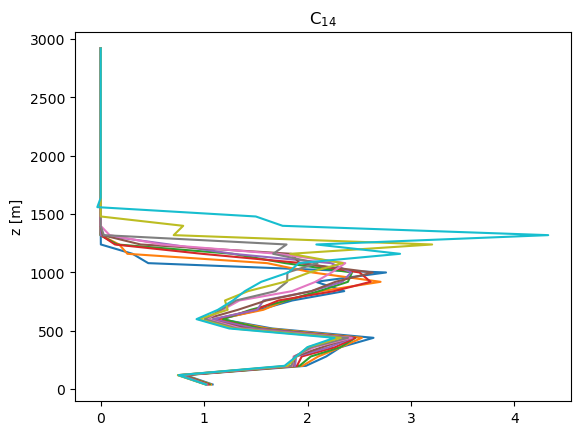

In [8]:
itime = range(30, 40)  # ngrdcol)
kstart = 0
kend = nzm  # -21 #int(0.75*nzm)
plt.plot(C14[itime, kstart:kend].T, zt[itime, kstart:kend].T)  # ,label='C14')
plt.ylabel("z [m]")
plt.title(r"C$_{14}$");

In [9]:
U2DFSN = sam.stagger_var("U2DFSN", ds, zt)
V2DFSN = sam.stagger_var("V2DFSN", ds, zt)

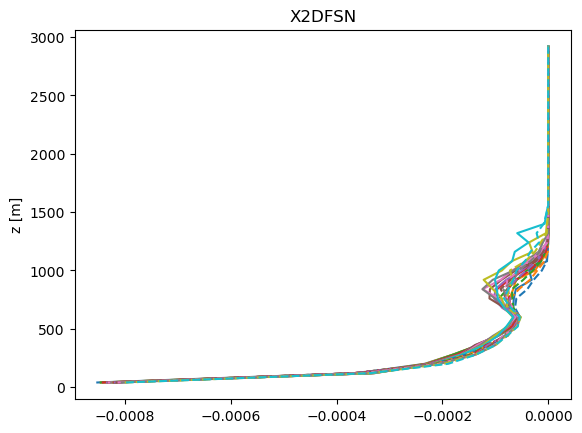

In [10]:
plt.plot(
    U2DFSN[itime, kstart:kend].T, zt[itime, kstart:kend].T, "-"
)  # ,label='U2DFSN')
plt.plot(
    V2DFSN[itime, kstart:kend].T, zt[itime, kstart:kend].T, "--"
)  # label='V2DFSN')
plt.ylabel("z [m]")
plt.title("X2DFSN");

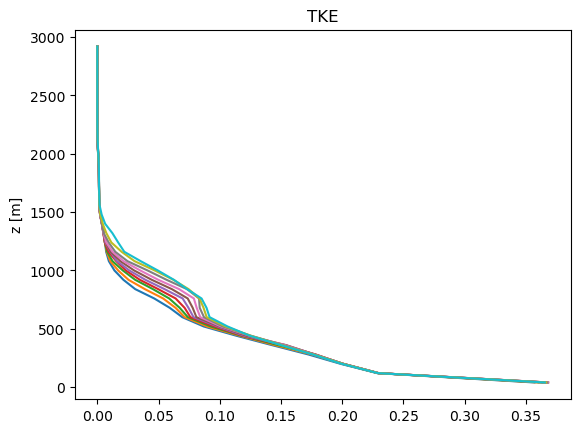

In [11]:
U2 = sam.stagger_var("U2", ds, zt)
V2 = sam.stagger_var("V2", ds, zt)
W2 = sam.stagger_var("W2", ds, zt)
e = 0.5 * (U2 + V2 + W2)

plt.plot(e[itime, kstart:kend].T, zt[itime, kstart:kend].T, label="e")
plt.ylabel("z [m]")
plt.title("TKE");

In [12]:
print(np.sum(C14 < 0))
print(np.sum(C14 == 0))
print(np.sum(C14 > 0))

219
3486
9615


In [13]:
print(np.sum((U2DFSN + V2DFSN) < 0))
print(np.sum((U2DFSN + V2DFSN) == 0))
print(np.sum((U2DFSN + V2DFSN) > 0))

9615
3486
219


In [14]:
np.sum((U2DFSN[itime, :-21] + V2DFSN[itime, :-21]) > 0)

np.int64(0)

In [15]:
print(np.sum(e < 0))
print(np.sum(e == 0))

0
0


In [16]:
L, Lup, Ldown = get_mixing_length(ds)
np.sum(L <= 0)

np.int64(0)

In [17]:
# kend = np.argmin(np.abs(zt[itime]-2000))
# plt.hist(C14[:,kstart:kend].flatten(),bins = 100);

In [18]:
C14_nonNeg = C14[C14 >= 0]
C14_pos = C14[C14 > 0]

Text(0, 0.5, 'Count')

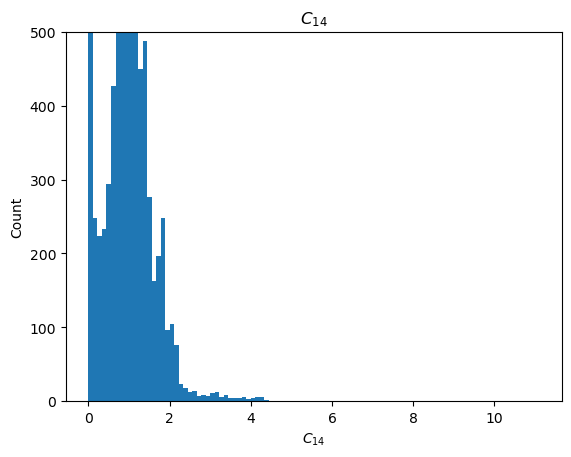

In [19]:
# plt.hist(np.log10(C14_nonNeg),bins = 100);
plt.hist(C14_nonNeg, bins=100)
plt.ylim((0, 500))
plt.title(r"$C_{14}$")
plt.xlabel(r"$C_{14}$")
plt.ylabel("Count")

In [20]:
print(np.mean(C14))
print(np.mean(C14_nonNeg))
print(np.mean(C14_pos))

0.612029828700826
0.6222868171826276
0.8479021936463447
